<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11898 entries, 0 to 11897
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Catalog Number                   11898 non-null  int64  
 1   Calendar Date                    11898 non-null  object 
 2   Eclipse Time                     11898 non-null  object 
 3   Delta T (s)                      11898 non-null  int64  
 4   Lunation Number                  11898 non-null  int64  
 5   Saros Number                     11898 non-null  int64  
 6   Eclipse Type                     11898 non-null  object 
 7   Gamma                            11898 non-null  float64
 8   Eclipse Magnitude                11898 non-null  float64
 9   Latitude                         11898 non-null  object 
 10  Longitude                        11898 non-null  object 
 11  Sun Altitude                     11898 non-null  int64  
 12  Sun Azimuth       

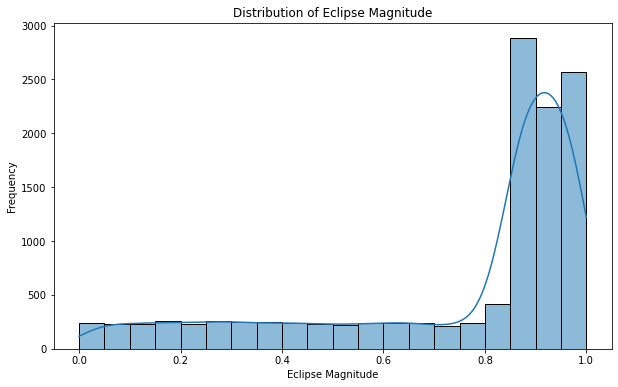

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "eclipse_data_enriched_5000_years.csv"
eclipse_data = pd.read_csv(file_path)

# Quick exploration of the dataset
print(eclipse_data.info())
print(eclipse_data.head())

# Address missing values
missing_values = eclipse_data.isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])

# 
# Histogram of Eclipse Magnitude
plt.figure(figsize=(10, 6))
sns.histplot(eclipse_data["Eclipse Magnitude"], bins=20, kde=True)
plt.title("Distribution of Eclipse Magnitude")
plt.xlabel("Eclipse Magnitude")
plt.ylabel("Frequency")
plt.show()



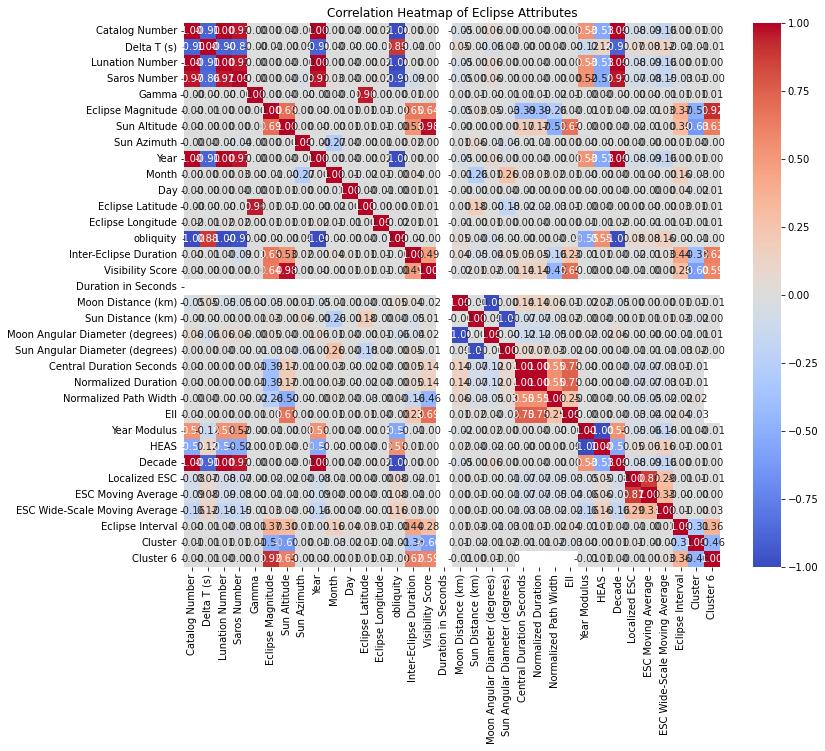

Correlation between Eclipse Magnitude, Moon Distance, and Sun Distance:
                    Eclipse Magnitude  Moon Distance (km)  Sun Distance (km)
Eclipse Magnitude            1.000000           -0.045455           0.029629
Moon Distance (km)          -0.045455            1.000000          -0.001072
Sun Distance (km)            0.029629           -0.001072           1.000000


In [2]:
# Example: Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = eclipse_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Eclipse Attributes")
plt.show()



# Eclipse Characteristics Study:
#  Correlations between eclipse magnitude, moon distance, and solar distance
correlation_matrix = eclipse_data[["Eclipse Magnitude", "Moon Distance (km)", "Sun Distance (km)"]].corr()
print("Correlation between Eclipse Magnitude, Moon Distance, and Sun Distance:")
print(correlation_matrix)



Accuracy: 0.5815126050420169


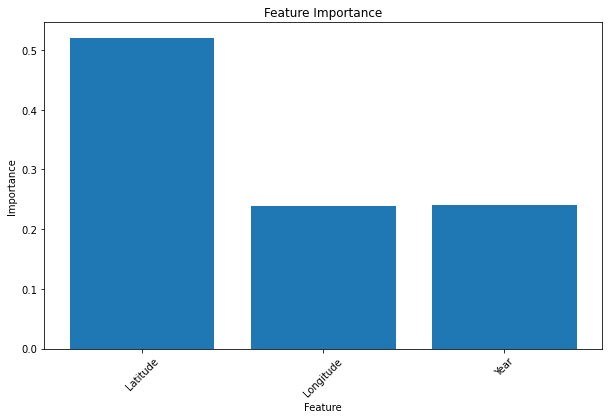

In [3]:
# Preprocess latitude and longitude columns to extract numeric values
eclipse_data['Latitude'] = eclipse_data['Latitude'].str.replace('N', '').str.replace('S', '').astype(float)
eclipse_data['Longitude'] = eclipse_data['Longitude'].str.replace('E', '').str.replace('W', '').astype(float)

# Prepare data
X = eclipse_data[['Latitude', 'Longitude', 'Year']]
y = eclipse_data['Eclipse Type']  # Predicting eclipse type

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the random forest classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot feature importance
feature_importance = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance)
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


In [4]:
file_path = "eclipse_data_enriched_5000_years.csv"
eclipse_data = pd.read_csv(file_path)

# Prepare data
X = eclipse_data.drop(columns=['Eclipse Classification'])
y = eclipse_data['Eclipse Classification']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the random forest classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9827731092436974

Classification Report:
                   precision    recall  f1-score   support

  Annular Eclipse       0.98      1.00      0.99       607
  Central Annular       0.95      0.91      0.93       135
    Central Total       0.99      0.96      0.97       120
   Hybrid Central       0.91      0.53      0.67        19
   Hybrid Eclipse       0.90      1.00      0.95        83
Partial from Edge       0.99      1.00      1.00       784
    Total Eclipse       0.99      1.00      0.99       477
 Unspecified Type       1.00      0.90      0.95       155

         accuracy                           0.98      2380
        macro avg       0.96      0.91      0.93      2380
     weighted avg       0.98      0.98      0.98      2380



In [ ]:
def plan_eclipse_photography(location):
    # Filter eclipse data based on user location
    filtered_data = eclipse_data[eclipse_data['Visibility'].str.contains(location, case=False)]
    return filtered_data

def main():
    print("Welcome to the Eclipse Photography Planner!")
    location = input("Enter your location: ")

    # Plan eclipse photography based on user input
    photography_plan = plan_eclipse_photography(location)

    if len(photography_plan) == 0:
        print("No eclipse events found for the specified location.")
    else:
        print("Eclipse Photography Plan for", location)
        print(photography_plan[['Calendar Date', 'Eclipse Type', 'Visibility']])

if __name__ == "__main__":
    main()

    

Welcome to the Eclipse Photography Planner!
